<a href="https://colab.research.google.com/github/GabrielCdev/Classification_FashionMNIST/blob/main/Classification_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 01

## FASHION MNIST
Neste exercício, você treinará um modelo de rede neural para classificação de imagens de roupas, como tênis, bermudas e camisetas.

Explore o conjunto de dados, entendendo como ele está disponibilizado.
Em seguida, construa uma rede neural que seja capaz de classificar corretamente os diferentes tipos de roupas/acessórios, sem over/underfitting. Ao final, mostre quantitativa e qualitativamente a qualidade do seu modelo, utilizando os conhecimentos e conceitos aprendidos até aqui. Faça isso em um jupyter notebook, detalhando a solução, descrevendo e analisando os resultados encontrados.

## Aluno

Gabriel Borges Calheiros

In [ ]:
import random
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
# Carregando o dataset
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

42162


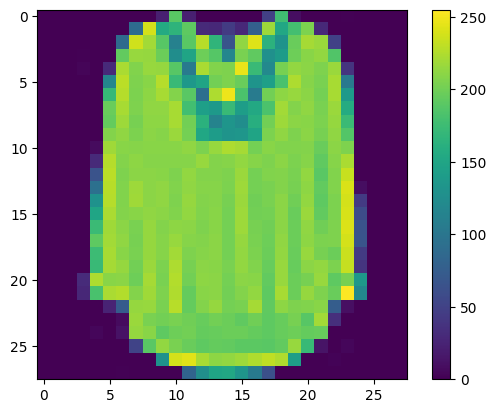

In [ ]:
# Plotando uma imagem qualquer (random) do dataset
rindex=random.randint(0, len(x_train))
print(rindex)
plt.figure()
plt.imshow(x_train[rindex])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Verificando dados das imagens
x_train.shape

(60000, 28, 28)

In [ ]:
# Transformando o array da imagen de 3D para 2D (para Keras)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# Convertendo para float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizando os valores RGB das imagens (0 a 1)
x_train /= 255
x_test /= 255

# Divisão do Dataset em treino e teste
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.3, random_state = 1)

print('Shape de x_train', x_train.shape)
print('Shape de x_val', x_val.shape)
print('Shape de y_train', y_train.shape)

print('Shape de y_train', y_train.shape)
print('Shape de y_val', y_val.shape)
print('Shape de y_test', y_test.shape)

Shape de x_train (42000, 784)
Shape de x_val (18000, 784)
Shape de y_train (42000,)
Shape de y_train (42000,)
Shape de y_val (18000,)
Shape de y_test (10000,)


In [ ]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Criando um modelo Sequential e adicionando as camadas
model = Sequential()
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

batch_size = 128
num_classes = 10
epochs = 50

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val))

Epoch 1/20
329/329 [==============================] - 120s 348ms/step - loss: 0.6533 - accuracy: 0.7936 - val_loss: 0.4837 - val_accuracy: 0.8189
Epoch 2/20
329/329 [==============================] - 105s 318ms/step - loss: 0.4349 - accuracy: 0.8434 - val_loss: 0.5080 - val_accuracy: 0.8251
Epoch 3/20
329/329 [==============================] - 126s 384ms/step - loss: 0.4103 - accuracy: 0.8513 - val_loss: 0.4829 - val_accuracy: 0.8296
Epoch 4/20
329/329 [==============================] - 130s 394ms/step - loss: 0.3894 - accuracy: 0.8588 - val_loss: 0.4974 - val_accuracy: 0.8298
Epoch 5/20
329/329 [==============================] - 103s 313ms/step - loss: 0.3636 - accuracy: 0.8657 - val_loss: 0.4700 - val_accuracy: 0.8349
Epoch 6/20
329/329 [==============================] - 104s 317ms/step - loss: 0.3562 - accuracy: 0.8692 - val_loss: 0.5224 - val_accuracy: 0.8251
Epoch 7/20
329/329 [==============================] - 103s 314ms/step - loss: 0.3495 - accuracy: 0.8714 - val_loss: 0.4073 -

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3537742793560028
Test accuracy: 0.8859000205993652


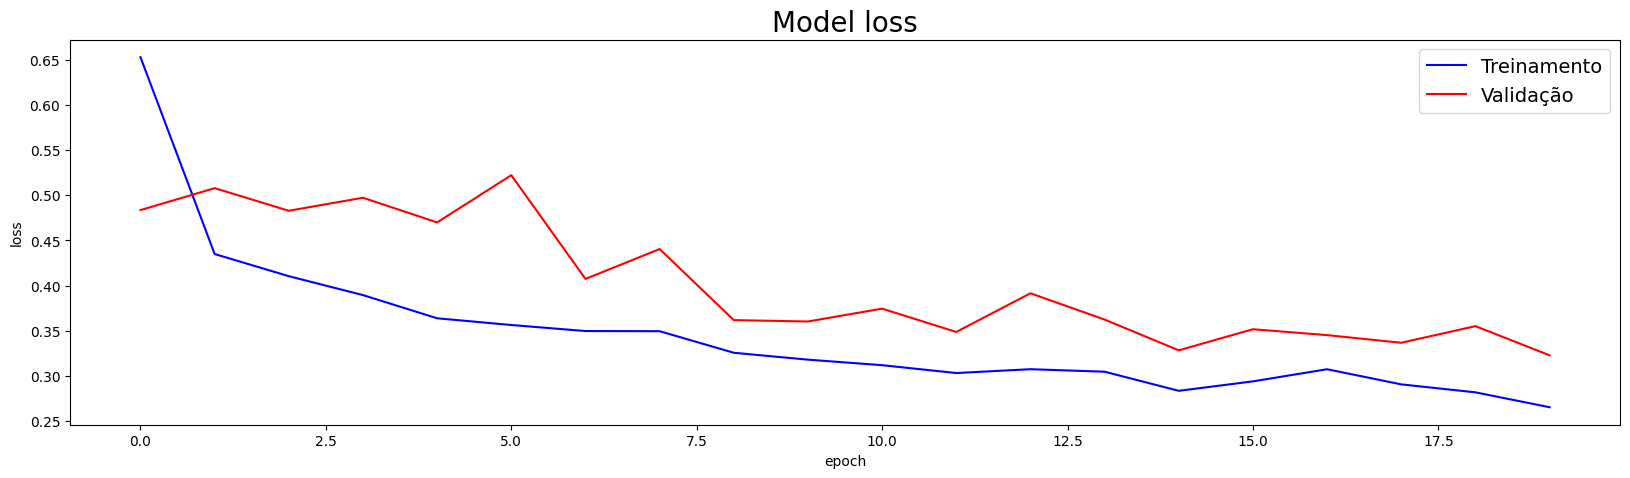

In [ ]:
# Plotando o historico do processo de treinamento
plt.figure(figsize=(20, 5))
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='red')
plt.title('Model loss', fontsize=20)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
plt.show()

1/1 [==============================] - 0s 130ms/step
[[7.7057635e-08 9.9999940e-01 2.0726453e-08 2.2030762e-09 1.1344796e-08
  3.1492129e-09 5.1724851e-07 4.5014961e-10 4.4004600e-09 6.8686506e-10]]
Predito: 1 ; Real: 1


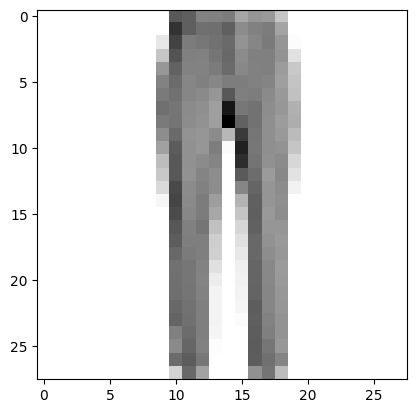

In [ ]:
image_index = 250 #0-9999
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 784))
print(pred)
print("Predito:",pred.argmax(),"; Real:",y_test[image_index].argmax())